In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
raw = fetch_california_housing()
x = pd.DataFrame(raw.data,columns=raw.feature_names)
y = raw.target
# Show feature names
print('Feature Names:',list(raw.feature_names))

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
# Show dataset description
print(raw.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [12]:
# Show dimension of X
print('Dimension of X:',x.shape)

Dimension of X: (20640, 8)


In [13]:
# Show dimension of y
print('Dimension of Y:',y.shape)

Dimension of Y: (20640,)


In [14]:
# Split X, y into X_train, X_test, y_train, y_test with 7:3 ratio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state=0)
print(x_train,'\n\n',x_test,'\n\n',y_train,'\n\n',y_test)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
1989   1.9750      52.0  2.800000   0.700000       193.0  4.825000     36.73   
256    2.2604      43.0  3.671480   1.184116       836.0  3.018051     37.77   
7887   6.2990      17.0  6.478022   1.087912      1387.0  3.810440     33.87   
4581   1.7199      17.0  2.518000   1.196000      3051.0  3.051000     34.06   
1993   2.2206      50.0  4.622754   1.161677       606.0  3.628743     36.73   
...       ...       ...       ...        ...         ...       ...       ...   
13123  4.4125      20.0  6.000000   1.045662       712.0  3.251142     38.27   
19648  2.9135      27.0  5.349282   0.933014       647.0  3.095694     37.48   
9845   3.1977      31.0  3.641221   0.941476       704.0  1.791349     36.58   
10799  5.6315      34.0  4.540598   1.064103      1052.0  2.247863     33.62   
2732   1.3882      15.0  3.929530   1.100671      1024.0  3.436242     32.80   

       Longitude  
1989     -119.79  
2

In [15]:
# Build a linear rfrom sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import numpy as np
linReg= LinearRegression()
linReg.fit(x_train, y_train)


LinearRegression()

In [16]:
# pridict y_pred from X_test
y_pred=linReg.predict(x_test)
print('y_pred:', y_pred)

y_pred: [2.2702672  2.79059912 1.90984782 ... 3.56895295 0.98163812 2.72552317]


In [19]:
# show coefficients of the features and find the argmax of coefficients
print('Coefficient of Features:',linReg.coef_,'\n')
print('Argmax of Coefficient:', np.argmax(y_pred))

Coefficient of Features: [ 4.46773975e-01  9.18409990e-03 -1.18116775e-01  6.42290879e-01
 -9.37026507e-06 -4.08535934e-03 -4.09023312e-01 -4.23419564e-01] 

Argmax of Coefficient: 2272


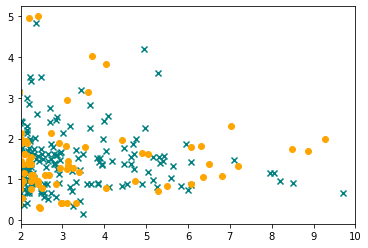

In [18]:
# Draw scatter plots of 
#             max coefficient feature of X_train - y_train as 'x' marker
#             max coefficient feature of X_test - y_test as 'o' marker
# xlim(2,10)
import matplotlib.pyplot as plt
#list(zip(x.columns,linReg.coef_)) can also be used to find Max coefficient feature of x_train
plt.scatter(x_train.AveBedrms, y_train, color="teal", marker='x')
plt.scatter(x_test.AveBedrms, y_test, color="orange", marker='o')
plt.xlim(2,10)
plt.show()
